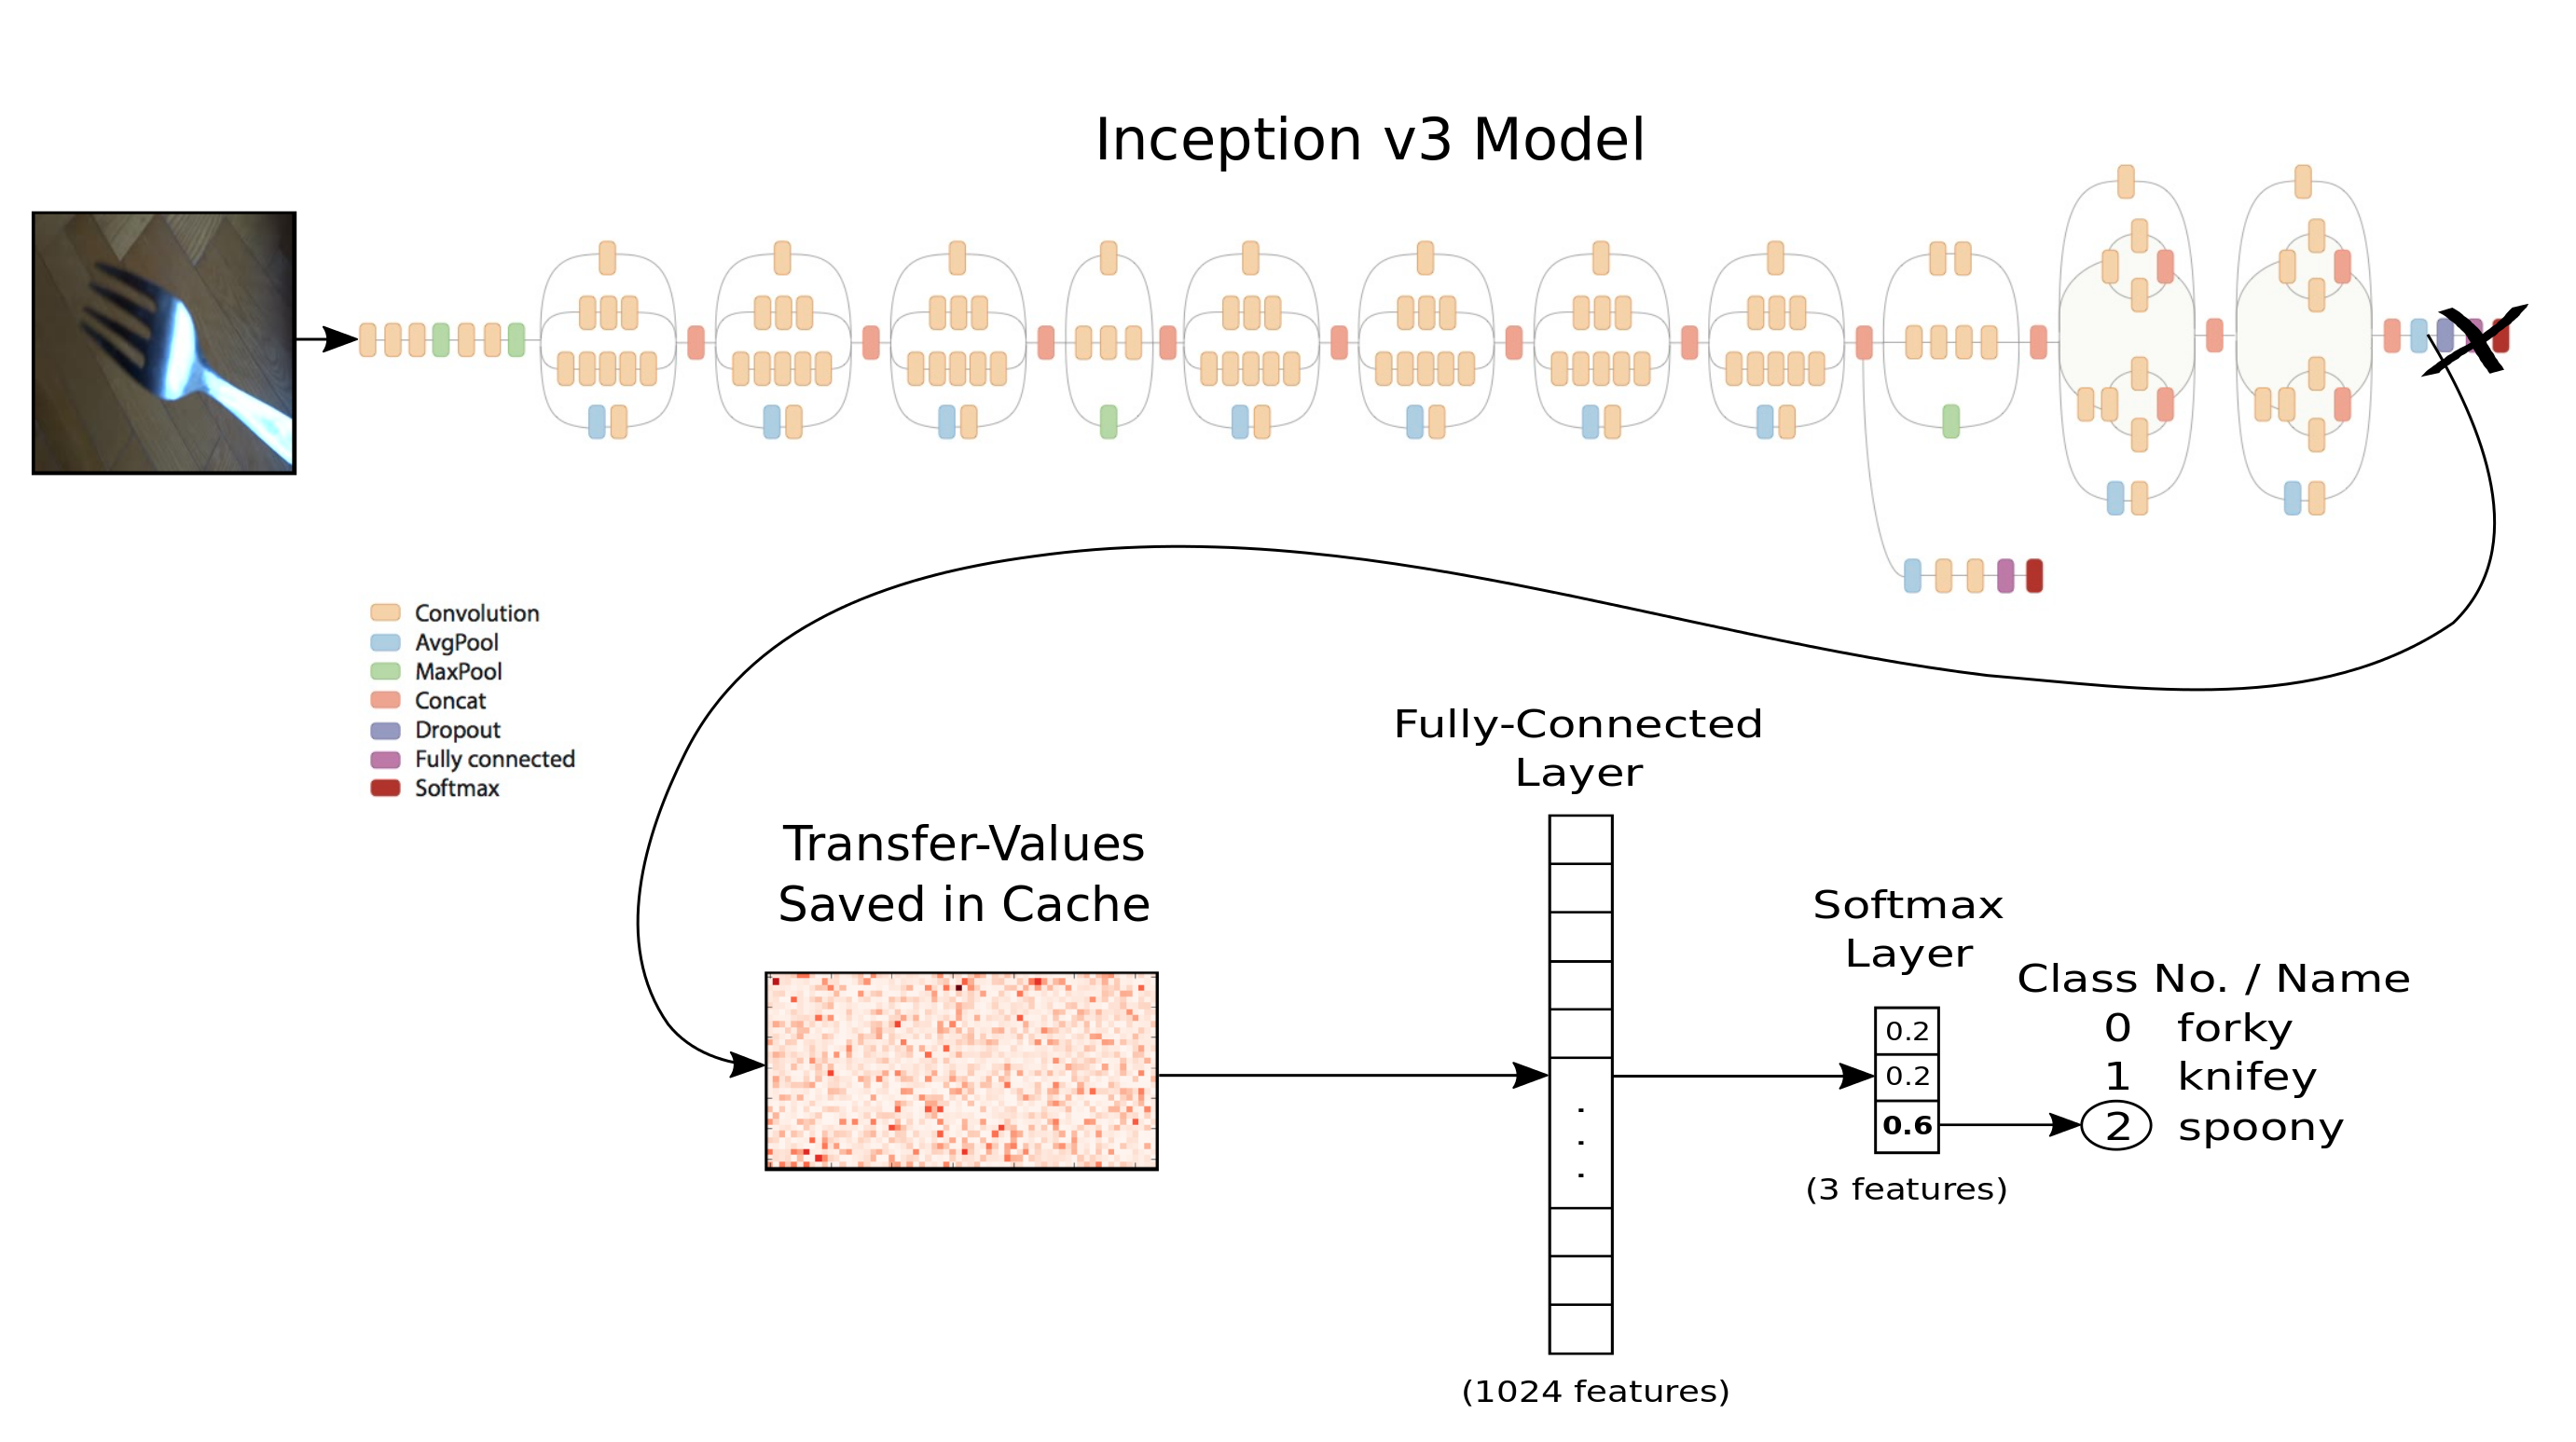

In [1]:
from IPython.display import Image, display
Image('D:\jupyter\\tensorflow_tutorial\images\\09_transfer_learning_flowchart.png')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

import inception
import prettytensor as pt

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import knifey

In [4]:
from knifey import num_classes

In [5]:
knifey.data_dr = "D:\jupyter\\tensorflow_tutorial\Ch09_Videodata\data\knifey-spoony"

In [6]:
data_dir = knifey.data_dir

In [7]:
knifey.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [8]:
dataset = knifey.load()

Creating dataset from the files in: data/knifey-spoony/
- Data loaded from cache-file: data/knifey-spoony/knifey-spoony.pkl


In [9]:
#Load own image-files
# from dataset import load_cached
# dataset = load_cached(cache_path='my_dataset_cache.pk1', in_dir='my_images/')
# num_classes = dataset.num_classes

In [10]:
class_names = dataset.class_names
class_names

['forky', 'knifey', 'spoony']

In [11]:
image_paths_train, cls_train, labels_train = dataset.get_training_set()

In [12]:
image_paths_train[0]

'D:\\jupyter\\tensorflow_tutorial\\Ch09_Videodata\\data\\knifey-spoony\\forky\\forky-01-0001.jpg'

In [13]:
image_paths_test, cls_test, labels_test = dataset.get_test_set()

In [14]:
image_paths_test[0]

'D:\\jupyter\\tensorflow_tutorial\\Ch09_Videodata\\data\\knifey-spoony\\forky\\test/forky-test-01-0001.jpg'

In [15]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(image_paths_train)))
print("- Test-set:\t\t{}".format(len(image_paths_test)))

Size of:
- Training-set:		4170
- Test-set:		530


In [16]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [17]:
#Helper-function for loadin imagges
from matplotlib.image import imread

def load_images(image_paths):
    images = [imread(path) for path in image_paths]
    
    return np.asarray(images)

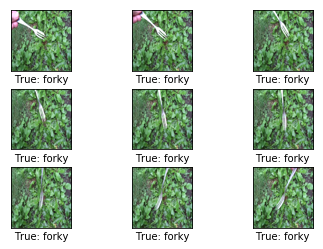

In [18]:
#Plot a few images to see if data is correct
images = load_images(image_paths=image_paths_test[0:9])

#Get the true classes for those images.
cls_true = cls_test[0:9]

#plt the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [19]:
#Download the inception Model
inception.data_dir = 'inception/'

In [20]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [21]:
model = inception.Inception()

In [22]:
#Calculate Transfer-Values

In [23]:
from inception import transfer_values_cache

In [24]:
file_path_cache_train = os.path.join(data_dir, 'inception-knifey-train.pk1')
file_path_cache_test = os.path.join(data_dir, 'inception-knifey-test.pk1')

In [25]:
print("Processing Inception transfer-values for training-images ...")

#If transfer-values have already been calculated then reload them,
#otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                             image_paths=image_paths_train,
                                             model=model)

Processing Inception transfer-values for training-images ...
- Processing image:   4170 / 4170
- Data saved to cache-file: data/knifey-spoony/inception-knifey-train.pk1


In [26]:
print("Processing Inception transfer-values for test-images ...")
#If transfer-values have already been calculated then reload them,
#otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                            image_paths=image_paths_test,
                                            model=model)

Processing Inception transfer-values for test-images ...
- Processing image:    530 / 530
- Data saved to cache-file: data/knifey-spoony/inception-knifey-test.pk1


In [27]:
#Check the shape of the array with the transfer-values in the train-set.
transfer_values_train.shape

(4170, 2048)

In [28]:
#Similarly, check the shape of the array with the transfer-values in the test-set.
transfer_values_test.shape

(530, 2048)

In [33]:
#Helper-function for plotting transfer-values.
def plot_transfer_values(i):
    print("Input image:")
    
    #Plot the i'th image from the test-set.
    image = imread(image_paths_test[i])
    plt.imshow(image, interpolation='spline16')
    plt.show()
    
    print("Transfer-values for the image using Inception model:")
    
    #Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32,64))
    
    #Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image:


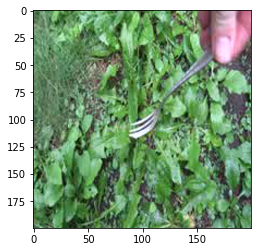

Transfer-values for the image using Inception model:


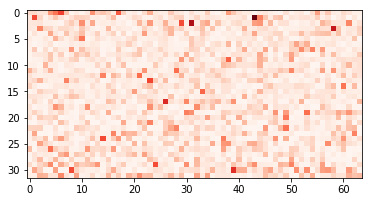

In [34]:
plot_transfer_values(i=10)

Input image:


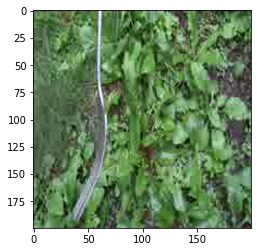

Transfer-values for the image using Inception model:


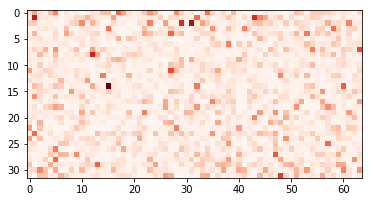

In [35]:
plot_transfer_values(i=100)

In [36]:
#Analysis of transfer-values using PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

In [39]:
#transfer_values = transfer_values_train[0:3000]
transfer_values = transfer_values_train

In [40]:
#cls = cls_train[0:3000]
cls = cls_train

In [41]:
transfer_values.shape

(4170, 2048)

In [42]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [43]:
transfer_values_reduced.shape

(4170, 2)

In [44]:
def plot_scatter(values, cls):
    #Create a color-map with a different color for each class.
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))
    
    #Create an index with a random permutation to make a better plot.
    idx = np.random.permutation(len(values))
    
    #Get the color for each sample.
    colors = cmap[cls[idx]]
    
    #Extract the x- and y-values.
    x = values[idx, 0]
    y = values[idx, 1]
    
    #Plot it.
    plt.scatter(x, y, color=colors, alpha=0.5)
    plt.show()

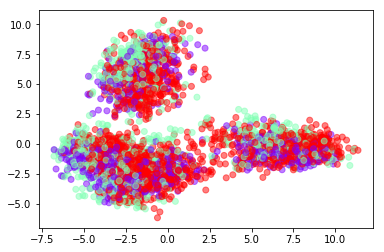

In [45]:
plot_scatter(transfer_values_reduced, cls=cls)

In [46]:
#Analysis of Transfer_values using t-SNE

In [48]:
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [49]:
tsne =TSNE(n_components=2)

In [50]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [51]:
transfer_values_reduced.shape

(4170, 2)

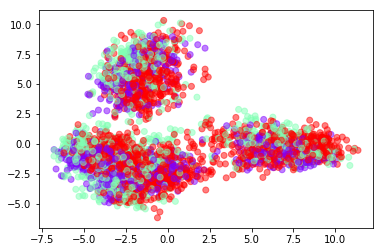

In [53]:
plot_scatter(transfer_values_50d, cls=cls)

In [54]:
#New classifier in Tensorflow

In [55]:
transfer_len = model.transfer_len

In [56]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')

In [57]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [59]:
y_true_cls = tf.argmax(y_true, axis=1)

In [60]:
#Neural Network

In [61]:
#Wrap the transfer-values as a Pretty Tensor object.
x_pretty = pt.wrap(x)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
    fully_connected(size=1024, name='layer_fc1').\
    softmax_classifier(num_classes=num_classes, labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [62]:
#Optimization Method.

In [63]:
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)

In [64]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate=1e-4).minimize(loss, global_step)

In [65]:
#Classification Accuracy

In [66]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [67]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [69]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [70]:
#Tensorflow Run

In [71]:
session = tf.Session()

In [72]:
session.run(tf.global_variables_initializer())

In [73]:
train_batch_size = 64

In [74]:
def random_batch():
    #Number of images(transfer_values) in the training-set.
    num_images = len(transfer_values_train)
    
    #Create a random index.
    idx = np.random.choice(num_images, size=train_batch_size, replace=False)
    
    #Use the random index to select random x and y_values.
    #We use the transfer-values instead of images as x-values.
    x_batch = transfer_values_train[idx]
    y_batch = labels_train[idx]
    
    return x_batch, y_batch

In [75]:
def optimize(num_iterations):
    #Start-time used for printing time-usage below.
    start_time =time.time()
    
    for i in range(num_iterations):
        #Get a batch of training examples.
        #x_batch now holds a batch of images(transfer-values) and 
        #y_true_batch are the true labels for those images.
        x_batch, y_true_batch = random_batch()
        
        #Put the batch into a dict with the proper names
        #for placeholder variables in the Tensorflow graph.
        feed_dict_train = {x:x_batch,
                          y_true:y_true_batch}
        
        #Run the optimizer using this batch of training data.
        i_global, _ = session.run([global_step, optimizer], feed_dict=feed_dict_train)
        
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            bacth_acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            msg = "Global Step: {0:>6}, Training batch accuracy: {1:>6.1%}"
            print(msg.format(i_global, bacth_acc))
            
    end_time = time.time()
    
    time_diff = end_time - start_time
    
    print("Time usage:" + str(timedelta(seconds=int(round(time_diff)))) )

In [76]:
#Helper-Functions for Showing Results


In [77]:
#Helper-function to plot example errors

In [78]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)

    # Get the indices for the incorrectly classified images.
    idx = np.flatnonzero(incorrect)

    # Number of images to select, max 9.
    n = min(len(idx), 9)
    
    # Randomize and select n indices.
    idx = np.random.choice(idx,
                           size=n,
                           replace=False)

    # Get the predicted classes for those images.
    cls_pred = cls_pred[idx]

    # Get the true classes for those images.
    cls_true = cls_test[idx]

    # Load the corresponding images from the test-set.
    # Note: We cannot do image_paths_test[idx] on lists of strings.
    image_paths = [image_paths_test[i] for i in idx]
    images = load_images(image_paths)

    # Plot the images.
    plot_images(images=images,
                cls_true=cls_true,
                cls_pred=cls_pred)

In [79]:
#Helper-function to plot confusion matrix

In [80]:
# Import a function from sklearn to calculate the confusion-matrix.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [81]:
#Helper-functions for calculating classifications

In [83]:
#Split the data-set in batches of this size to limit RAM usage.
batch_size = 256

def predict_cls(transfer_values, labels, cls_true):
    #Number of iamges
    num_images = len(transfer_values)
    
    #Allocate an array for the predicted classes which
    #will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)
    
    i = 0
    while i < num_images:
            #The ending index for the next batch is denoted j.
            j = min(i + batch_size, num_images)
            
            #Create a feed-dict with the images and labels
            #between index i and j.
            feed_dict = {x:transfer_values[i:j], y_true:labels[i:j]}
            
            #Calculate the predicted class using Tensoflow.
            cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
            
            #Set the start-index for the next batch to the 
            #end-index of the current batch.
            i = j
    
    #Create a boolean array whether each each image is correctly classified.
    correct = (cls_true == cls_pred)
    
    return correct, cls_pred



In [84]:
def predict_cls_test():
    return predict_cls(transfer_values = transfer_values_test,
                      labels = labels_test,
                      cls_true = cls_test)

In [85]:
def classification_accuracy(correct):
    
    return correct.mean(), correct.sum()

In [86]:
#Helper-function for showing the classification accuracy

In [87]:
def print_test_accuracy(show_example_errors=False,
                       show_confusion_matrix=False):
    
    #For all the images in the test-set,
    #calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()
    
    #Classification accuracy and the number of correct classifications.
    acc, num_correct = classification_accuracy(correct)
    
    #Number of images being classified.
    num_images = len(correct)
    
    #Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1}/{2})"
    print(msg.format(acc, num_correct, num_images))
    
    #Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors: ")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
        
    #Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [88]:
print_test_accuracy(show_example_errors=False,
                   show_confusion_matrix=True)

Accuracy on Test-Set: 44.7% (237/530)
Confusion Matrix:
[  0   2 149] (0) forky
[  0   3 134] (1) knifey
[  0   8 234] (2) spoony
 (0) (1) (2)


In [89]:
#Performance after 1000 optimization iterations

In [90]:
optimize(num_iterations=1000)

Global Step:    100, Training batch accuracy:  50.0%
Global Step:    200, Training batch accuracy:  43.8%
Global Step:    300, Training batch accuracy:  48.4%
Global Step:    400, Training batch accuracy:  50.0%
Global Step:    500, Training batch accuracy:  43.8%
Global Step:    600, Training batch accuracy:  43.8%
Global Step:    700, Training batch accuracy:  37.5%
Global Step:    800, Training batch accuracy:  40.6%
Global Step:    900, Training batch accuracy:  43.8%
Global Step:   1000, Training batch accuracy:  53.1%
Time usage:0:00:05


Accuracy on Test-Set: 45.1% (239/530)
Example errors: 


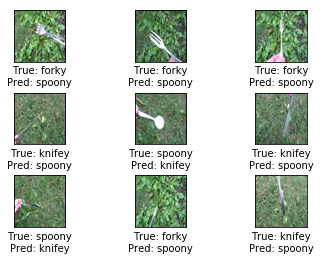

Confusion Matrix:
[  0   3 148] (0) forky
[  0   6 131] (1) knifey
[  0   9 233] (2) spoony
 (0) (1) (2)


In [91]:
print_test_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [92]:
optimize(num_iterations=10000)

Global Step:   1100, Training batch accuracy:  50.0%
Global Step:   1200, Training batch accuracy:  43.8%
Global Step:   1300, Training batch accuracy:  48.4%
Global Step:   1400, Training batch accuracy:  42.2%
Global Step:   1500, Training batch accuracy:  53.1%
Global Step:   1600, Training batch accuracy:  48.4%
Global Step:   1700, Training batch accuracy:  39.1%
Global Step:   1800, Training batch accuracy:  46.9%
Global Step:   1900, Training batch accuracy:  46.9%
Global Step:   2000, Training batch accuracy:  60.9%
Global Step:   2100, Training batch accuracy:  42.2%
Global Step:   2200, Training batch accuracy:  57.8%
Global Step:   2300, Training batch accuracy:  42.2%
Global Step:   2400, Training batch accuracy:  51.6%
Global Step:   2500, Training batch accuracy:  42.2%
Global Step:   2600, Training batch accuracy:  50.0%
Global Step:   2700, Training batch accuracy:  50.0%
Global Step:   2800, Training batch accuracy:  45.3%
Global Step:   2900, Training batch accuracy: 

In [93]:
optimize(num_iterations=10000)

Global Step:  11100, Training batch accuracy:  76.6%
Global Step:  11200, Training batch accuracy:  62.5%
Global Step:  11300, Training batch accuracy:  65.6%
Global Step:  11400, Training batch accuracy:  62.5%
Global Step:  11500, Training batch accuracy:  67.2%
Global Step:  11600, Training batch accuracy:  78.1%
Global Step:  11700, Training batch accuracy:  71.9%
Global Step:  11800, Training batch accuracy:  65.6%
Global Step:  11900, Training batch accuracy:  68.8%
Global Step:  12000, Training batch accuracy:  76.6%
Global Step:  12100, Training batch accuracy:  76.6%
Global Step:  12200, Training batch accuracy:  73.4%
Global Step:  12300, Training batch accuracy:  73.4%
Global Step:  12400, Training batch accuracy:  57.8%
Global Step:  12500, Training batch accuracy:  71.9%
Global Step:  12600, Training batch accuracy:  76.6%
Global Step:  12700, Training batch accuracy:  71.9%
Global Step:  12800, Training batch accuracy:  67.2%
Global Step:  12900, Training batch accuracy: 

In [94]:
optimize(num_iterations=30000)

Global Step:  21100, Training batch accuracy:  73.4%
Global Step:  21200, Training batch accuracy:  70.3%
Global Step:  21300, Training batch accuracy:  73.4%
Global Step:  21400, Training batch accuracy:  75.0%
Global Step:  21500, Training batch accuracy:  73.4%
Global Step:  21600, Training batch accuracy:  76.6%
Global Step:  21700, Training batch accuracy:  75.0%
Global Step:  21800, Training batch accuracy:  68.8%
Global Step:  21900, Training batch accuracy:  73.4%
Global Step:  22000, Training batch accuracy:  78.1%
Global Step:  22100, Training batch accuracy:  81.2%
Global Step:  22200, Training batch accuracy:  78.1%
Global Step:  22300, Training batch accuracy:  73.4%
Global Step:  22400, Training batch accuracy:  76.6%
Global Step:  22500, Training batch accuracy:  78.1%
Global Step:  22600, Training batch accuracy:  81.2%
Global Step:  22700, Training batch accuracy:  84.4%
Global Step:  22800, Training batch accuracy:  78.1%
Global Step:  22900, Training batch accuracy: 

Global Step:  36600, Training batch accuracy:  81.2%
Global Step:  36700, Training batch accuracy:  87.5%
Global Step:  36800, Training batch accuracy:  82.8%
Global Step:  36900, Training batch accuracy:  81.2%
Global Step:  37000, Training batch accuracy:  79.7%
Global Step:  37100, Training batch accuracy:  85.9%
Global Step:  37200, Training batch accuracy:  81.2%
Global Step:  37300, Training batch accuracy:  90.6%
Global Step:  37400, Training batch accuracy:  84.4%
Global Step:  37500, Training batch accuracy:  81.2%
Global Step:  37600, Training batch accuracy:  89.1%
Global Step:  37700, Training batch accuracy:  82.8%
Global Step:  37800, Training batch accuracy:  81.2%
Global Step:  37900, Training batch accuracy:  85.9%
Global Step:  38000, Training batch accuracy:  90.6%
Global Step:  38100, Training batch accuracy:  79.7%
Global Step:  38200, Training batch accuracy:  76.6%
Global Step:  38300, Training batch accuracy:  89.1%
Global Step:  38400, Training batch accuracy: 

In [95]:
optimize(num_iterations=50000)

Global Step:  51100, Training batch accuracy:  85.9%
Global Step:  51200, Training batch accuracy:  87.5%
Global Step:  51300, Training batch accuracy:  78.1%
Global Step:  51400, Training batch accuracy:  84.4%
Global Step:  51500, Training batch accuracy:  79.7%
Global Step:  51600, Training batch accuracy:  90.6%
Global Step:  51700, Training batch accuracy:  89.1%
Global Step:  51800, Training batch accuracy:  81.2%
Global Step:  51900, Training batch accuracy:  89.1%
Global Step:  52000, Training batch accuracy:  89.1%
Global Step:  52100, Training batch accuracy:  85.9%
Global Step:  52200, Training batch accuracy:  90.6%
Global Step:  52300, Training batch accuracy:  87.5%
Global Step:  52400, Training batch accuracy:  89.1%
Global Step:  52500, Training batch accuracy:  92.2%
Global Step:  52600, Training batch accuracy:  85.9%
Global Step:  52700, Training batch accuracy:  87.5%
Global Step:  52800, Training batch accuracy:  87.5%
Global Step:  52900, Training batch accuracy: 

Global Step:  66600, Training batch accuracy:  90.6%
Global Step:  66700, Training batch accuracy:  96.9%
Global Step:  66800, Training batch accuracy:  96.9%
Global Step:  66900, Training batch accuracy:  85.9%
Global Step:  67000, Training batch accuracy:  87.5%
Global Step:  67100, Training batch accuracy:  90.6%
Global Step:  67200, Training batch accuracy:  85.9%
Global Step:  67300, Training batch accuracy:  87.5%
Global Step:  67400, Training batch accuracy:  92.2%
Global Step:  67500, Training batch accuracy:  90.6%
Global Step:  67600, Training batch accuracy:  87.5%
Global Step:  67700, Training batch accuracy:  82.8%
Global Step:  67800, Training batch accuracy:  84.4%
Global Step:  67900, Training batch accuracy:  87.5%
Global Step:  68000, Training batch accuracy:  90.6%
Global Step:  68100, Training batch accuracy:  85.9%
Global Step:  68200, Training batch accuracy:  89.1%
Global Step:  68300, Training batch accuracy:  92.2%
Global Step:  68400, Training batch accuracy: 

Global Step:  82100, Training batch accuracy:  87.5%
Global Step:  82200, Training batch accuracy:  90.6%
Global Step:  82300, Training batch accuracy:  89.1%
Global Step:  82400, Training batch accuracy:  89.1%
Global Step:  82500, Training batch accuracy:  85.9%
Global Step:  82600, Training batch accuracy:  92.2%
Global Step:  82700, Training batch accuracy:  92.2%
Global Step:  82800, Training batch accuracy:  90.6%
Global Step:  82900, Training batch accuracy:  90.6%
Global Step:  83000, Training batch accuracy:  89.1%
Global Step:  83100, Training batch accuracy:  85.9%
Global Step:  83200, Training batch accuracy:  81.2%
Global Step:  83300, Training batch accuracy:  85.9%
Global Step:  83400, Training batch accuracy:  90.6%
Global Step:  83500, Training batch accuracy:  96.9%
Global Step:  83600, Training batch accuracy:  90.6%
Global Step:  83700, Training batch accuracy:  85.9%
Global Step:  83800, Training batch accuracy:  87.5%
Global Step:  83900, Training batch accuracy: 

Global Step:  97600, Training batch accuracy:  85.9%
Global Step:  97700, Training batch accuracy:  90.6%
Global Step:  97800, Training batch accuracy:  93.8%
Global Step:  97900, Training batch accuracy:  93.8%
Global Step:  98000, Training batch accuracy:  90.6%
Global Step:  98100, Training batch accuracy:  93.8%
Global Step:  98200, Training batch accuracy:  95.3%
Global Step:  98300, Training batch accuracy:  90.6%
Global Step:  98400, Training batch accuracy:  92.2%
Global Step:  98500, Training batch accuracy:  95.3%
Global Step:  98600, Training batch accuracy:  84.4%
Global Step:  98700, Training batch accuracy:  93.8%
Global Step:  98800, Training batch accuracy:  93.8%
Global Step:  98900, Training batch accuracy:  89.1%
Global Step:  99000, Training batch accuracy:  90.6%
Global Step:  99100, Training batch accuracy:  95.3%
Global Step:  99200, Training batch accuracy:  89.1%
Global Step:  99300, Training batch accuracy:  90.6%
Global Step:  99400, Training batch accuracy: 

In [96]:
optimize(num_iterations=100000)

Global Step: 101100, Training batch accuracy:  89.1%
Global Step: 101200, Training batch accuracy:  90.6%
Global Step: 101300, Training batch accuracy:  92.2%
Global Step: 101400, Training batch accuracy:  89.1%
Global Step: 101500, Training batch accuracy:  89.1%
Global Step: 101600, Training batch accuracy:  85.9%
Global Step: 101700, Training batch accuracy:  87.5%
Global Step: 101800, Training batch accuracy:  93.8%
Global Step: 101900, Training batch accuracy:  95.3%
Global Step: 102000, Training batch accuracy:  93.8%
Global Step: 102100, Training batch accuracy:  84.4%
Global Step: 102200, Training batch accuracy:  89.1%
Global Step: 102300, Training batch accuracy:  92.2%
Global Step: 102400, Training batch accuracy:  90.6%
Global Step: 102500, Training batch accuracy:  96.9%
Global Step: 102600, Training batch accuracy:  89.1%
Global Step: 102700, Training batch accuracy:  89.1%
Global Step: 102800, Training batch accuracy:  92.2%
Global Step: 102900, Training batch accuracy: 

Global Step: 116600, Training batch accuracy:  84.4%
Global Step: 116700, Training batch accuracy:  87.5%
Global Step: 116800, Training batch accuracy:  93.8%
Global Step: 116900, Training batch accuracy:  89.1%
Global Step: 117000, Training batch accuracy:  90.6%
Global Step: 117100, Training batch accuracy:  98.4%
Global Step: 117200, Training batch accuracy:  93.8%
Global Step: 117300, Training batch accuracy:  90.6%
Global Step: 117400, Training batch accuracy:  93.8%
Global Step: 117500, Training batch accuracy:  95.3%
Global Step: 117600, Training batch accuracy:  95.3%
Global Step: 117700, Training batch accuracy:  92.2%
Global Step: 117800, Training batch accuracy:  90.6%
Global Step: 117900, Training batch accuracy:  96.9%
Global Step: 118000, Training batch accuracy:  93.8%
Global Step: 118100, Training batch accuracy:  95.3%
Global Step: 118200, Training batch accuracy:  96.9%
Global Step: 118300, Training batch accuracy:  92.2%
Global Step: 118400, Training batch accuracy: 

Global Step: 132100, Training batch accuracy:  90.6%
Global Step: 132200, Training batch accuracy:  95.3%
Global Step: 132300, Training batch accuracy:  96.9%
Global Step: 132400, Training batch accuracy:  95.3%
Global Step: 132500, Training batch accuracy:  89.1%
Global Step: 132600, Training batch accuracy:  95.3%
Global Step: 132700, Training batch accuracy:  93.8%
Global Step: 132800, Training batch accuracy:  89.1%
Global Step: 132900, Training batch accuracy:  89.1%
Global Step: 133000, Training batch accuracy:  96.9%
Global Step: 133100, Training batch accuracy:  95.3%
Global Step: 133200, Training batch accuracy:  92.2%
Global Step: 133300, Training batch accuracy:  92.2%
Global Step: 133400, Training batch accuracy:  96.9%
Global Step: 133500, Training batch accuracy:  90.6%
Global Step: 133600, Training batch accuracy:  95.3%
Global Step: 133700, Training batch accuracy:  96.9%
Global Step: 133800, Training batch accuracy:  98.4%
Global Step: 133900, Training batch accuracy: 

Global Step: 147600, Training batch accuracy:  90.6%
Global Step: 147700, Training batch accuracy:  90.6%
Global Step: 147800, Training batch accuracy:  92.2%
Global Step: 147900, Training batch accuracy: 100.0%
Global Step: 148000, Training batch accuracy:  95.3%
Global Step: 148100, Training batch accuracy:  93.8%
Global Step: 148200, Training batch accuracy:  92.2%
Global Step: 148300, Training batch accuracy:  95.3%
Global Step: 148400, Training batch accuracy:  89.1%
Global Step: 148500, Training batch accuracy:  95.3%
Global Step: 148600, Training batch accuracy:  93.8%
Global Step: 148700, Training batch accuracy:  93.8%
Global Step: 148800, Training batch accuracy:  93.8%
Global Step: 148900, Training batch accuracy:  92.2%
Global Step: 149000, Training batch accuracy:  93.8%
Global Step: 149100, Training batch accuracy:  96.9%
Global Step: 149200, Training batch accuracy:  96.9%
Global Step: 149300, Training batch accuracy:  92.2%
Global Step: 149400, Training batch accuracy: 

Global Step: 163100, Training batch accuracy:  92.2%
Global Step: 163200, Training batch accuracy:  90.6%
Global Step: 163300, Training batch accuracy:  92.2%
Global Step: 163400, Training batch accuracy:  95.3%
Global Step: 163500, Training batch accuracy:  98.4%
Global Step: 163600, Training batch accuracy:  92.2%
Global Step: 163700, Training batch accuracy:  95.3%
Global Step: 163800, Training batch accuracy:  96.9%
Global Step: 163900, Training batch accuracy:  95.3%
Global Step: 164000, Training batch accuracy:  92.2%
Global Step: 164100, Training batch accuracy:  96.9%
Global Step: 164200, Training batch accuracy:  93.8%
Global Step: 164300, Training batch accuracy:  96.9%
Global Step: 164400, Training batch accuracy:  93.8%
Global Step: 164500, Training batch accuracy:  92.2%
Global Step: 164600, Training batch accuracy:  96.9%
Global Step: 164700, Training batch accuracy:  92.2%
Global Step: 164800, Training batch accuracy:  96.9%
Global Step: 164900, Training batch accuracy: 

Global Step: 178600, Training batch accuracy:  90.6%
Global Step: 178700, Training batch accuracy:  92.2%
Global Step: 178800, Training batch accuracy:  96.9%
Global Step: 178900, Training batch accuracy:  93.8%
Global Step: 179000, Training batch accuracy:  95.3%
Global Step: 179100, Training batch accuracy: 100.0%
Global Step: 179200, Training batch accuracy:  98.4%
Global Step: 179300, Training batch accuracy: 100.0%
Global Step: 179400, Training batch accuracy:  95.3%
Global Step: 179500, Training batch accuracy:  93.8%
Global Step: 179600, Training batch accuracy:  98.4%
Global Step: 179700, Training batch accuracy:  95.3%
Global Step: 179800, Training batch accuracy:  95.3%
Global Step: 179900, Training batch accuracy:  93.8%
Global Step: 180000, Training batch accuracy:  98.4%
Global Step: 180100, Training batch accuracy:  96.9%
Global Step: 180200, Training batch accuracy:  95.3%
Global Step: 180300, Training batch accuracy:  98.4%
Global Step: 180400, Training batch accuracy: 

Global Step: 194100, Training batch accuracy:  95.3%
Global Step: 194200, Training batch accuracy:  95.3%
Global Step: 194300, Training batch accuracy:  92.2%
Global Step: 194400, Training batch accuracy:  96.9%
Global Step: 194500, Training batch accuracy:  95.3%
Global Step: 194600, Training batch accuracy:  96.9%
Global Step: 194700, Training batch accuracy:  92.2%
Global Step: 194800, Training batch accuracy:  89.1%
Global Step: 194900, Training batch accuracy:  92.2%
Global Step: 195000, Training batch accuracy:  93.8%
Global Step: 195100, Training batch accuracy:  92.2%
Global Step: 195200, Training batch accuracy:  93.8%
Global Step: 195300, Training batch accuracy:  93.8%
Global Step: 195400, Training batch accuracy:  95.3%
Global Step: 195500, Training batch accuracy:  92.2%
Global Step: 195600, Training batch accuracy:  92.2%
Global Step: 195700, Training batch accuracy:  95.3%
Global Step: 195800, Training batch accuracy:  96.9%
Global Step: 195900, Training batch accuracy: 

In [97]:
optimize(num_iterations=100000)

Global Step: 201100, Training batch accuracy:  92.2%
Global Step: 201200, Training batch accuracy:  96.9%
Global Step: 201300, Training batch accuracy:  96.9%
Global Step: 201400, Training batch accuracy:  98.4%
Global Step: 201500, Training batch accuracy:  95.3%
Global Step: 201600, Training batch accuracy:  90.6%
Global Step: 201700, Training batch accuracy:  98.4%
Global Step: 201800, Training batch accuracy:  96.9%
Global Step: 201900, Training batch accuracy:  93.8%
Global Step: 202000, Training batch accuracy:  92.2%
Global Step: 202100, Training batch accuracy:  92.2%
Global Step: 202200, Training batch accuracy:  96.9%
Global Step: 202300, Training batch accuracy:  98.4%
Global Step: 202400, Training batch accuracy:  98.4%
Global Step: 202500, Training batch accuracy:  90.6%
Global Step: 202600, Training batch accuracy:  90.6%
Global Step: 202700, Training batch accuracy:  92.2%
Global Step: 202800, Training batch accuracy:  95.3%
Global Step: 202900, Training batch accuracy: 

Global Step: 216600, Training batch accuracy:  96.9%
Global Step: 216700, Training batch accuracy:  95.3%
Global Step: 216800, Training batch accuracy:  95.3%
Global Step: 216900, Training batch accuracy:  93.8%
Global Step: 217000, Training batch accuracy:  96.9%
Global Step: 217100, Training batch accuracy:  96.9%
Global Step: 217200, Training batch accuracy:  95.3%
Global Step: 217300, Training batch accuracy:  95.3%
Global Step: 217400, Training batch accuracy:  93.8%
Global Step: 217500, Training batch accuracy:  96.9%
Global Step: 217600, Training batch accuracy:  93.8%
Global Step: 217700, Training batch accuracy:  85.9%
Global Step: 217800, Training batch accuracy:  95.3%
Global Step: 217900, Training batch accuracy:  90.6%
Global Step: 218000, Training batch accuracy:  98.4%
Global Step: 218100, Training batch accuracy:  96.9%
Global Step: 218200, Training batch accuracy:  98.4%
Global Step: 218300, Training batch accuracy:  93.8%
Global Step: 218400, Training batch accuracy: 

Global Step: 232100, Training batch accuracy:  98.4%
Global Step: 232200, Training batch accuracy:  95.3%
Global Step: 232300, Training batch accuracy:  93.8%
Global Step: 232400, Training batch accuracy:  92.2%
Global Step: 232500, Training batch accuracy:  93.8%
Global Step: 232600, Training batch accuracy:  98.4%
Global Step: 232700, Training batch accuracy:  95.3%
Global Step: 232800, Training batch accuracy:  96.9%
Global Step: 232900, Training batch accuracy:  95.3%
Global Step: 233000, Training batch accuracy:  95.3%
Global Step: 233100, Training batch accuracy:  95.3%
Global Step: 233200, Training batch accuracy:  92.2%
Global Step: 233300, Training batch accuracy:  93.8%
Global Step: 233400, Training batch accuracy:  98.4%
Global Step: 233500, Training batch accuracy:  98.4%
Global Step: 233600, Training batch accuracy:  95.3%
Global Step: 233700, Training batch accuracy:  89.1%
Global Step: 233800, Training batch accuracy:  95.3%
Global Step: 233900, Training batch accuracy: 

Global Step: 247600, Training batch accuracy:  96.9%
Global Step: 247700, Training batch accuracy:  98.4%
Global Step: 247800, Training batch accuracy:  96.9%
Global Step: 247900, Training batch accuracy:  90.6%
Global Step: 248000, Training batch accuracy:  96.9%
Global Step: 248100, Training batch accuracy:  90.6%
Global Step: 248200, Training batch accuracy:  98.4%
Global Step: 248300, Training batch accuracy:  96.9%
Global Step: 248400, Training batch accuracy:  96.9%
Global Step: 248500, Training batch accuracy:  96.9%
Global Step: 248600, Training batch accuracy:  96.9%
Global Step: 248700, Training batch accuracy:  96.9%
Global Step: 248800, Training batch accuracy:  98.4%
Global Step: 248900, Training batch accuracy:  96.9%
Global Step: 249000, Training batch accuracy:  98.4%
Global Step: 249100, Training batch accuracy:  98.4%
Global Step: 249200, Training batch accuracy: 100.0%
Global Step: 249300, Training batch accuracy:  95.3%
Global Step: 249400, Training batch accuracy: 

Global Step: 263100, Training batch accuracy:  93.8%
Global Step: 263200, Training batch accuracy:  96.9%
Global Step: 263300, Training batch accuracy:  92.2%
Global Step: 263400, Training batch accuracy:  93.8%
Global Step: 263500, Training batch accuracy:  96.9%
Global Step: 263600, Training batch accuracy:  89.1%
Global Step: 263700, Training batch accuracy:  98.4%
Global Step: 263800, Training batch accuracy:  98.4%
Global Step: 263900, Training batch accuracy:  93.8%
Global Step: 264000, Training batch accuracy:  95.3%
Global Step: 264100, Training batch accuracy:  96.9%
Global Step: 264200, Training batch accuracy:  95.3%
Global Step: 264300, Training batch accuracy:  98.4%
Global Step: 264400, Training batch accuracy:  90.6%
Global Step: 264500, Training batch accuracy:  98.4%
Global Step: 264600, Training batch accuracy:  98.4%
Global Step: 264700, Training batch accuracy:  98.4%
Global Step: 264800, Training batch accuracy:  98.4%
Global Step: 264900, Training batch accuracy: 

Global Step: 278600, Training batch accuracy:  93.8%
Global Step: 278700, Training batch accuracy:  96.9%
Global Step: 278800, Training batch accuracy:  93.8%
Global Step: 278900, Training batch accuracy:  98.4%
Global Step: 279000, Training batch accuracy:  98.4%
Global Step: 279100, Training batch accuracy:  96.9%
Global Step: 279200, Training batch accuracy:  96.9%
Global Step: 279300, Training batch accuracy:  96.9%
Global Step: 279400, Training batch accuracy:  93.8%
Global Step: 279500, Training batch accuracy: 100.0%
Global Step: 279600, Training batch accuracy:  96.9%
Global Step: 279700, Training batch accuracy:  93.8%
Global Step: 279800, Training batch accuracy:  95.3%
Global Step: 279900, Training batch accuracy:  96.9%
Global Step: 280000, Training batch accuracy:  98.4%
Global Step: 280100, Training batch accuracy:  95.3%
Global Step: 280200, Training batch accuracy:  92.2%
Global Step: 280300, Training batch accuracy: 100.0%
Global Step: 280400, Training batch accuracy: 

Global Step: 294100, Training batch accuracy:  95.3%
Global Step: 294200, Training batch accuracy:  92.2%
Global Step: 294300, Training batch accuracy:  98.4%
Global Step: 294400, Training batch accuracy:  95.3%
Global Step: 294500, Training batch accuracy:  95.3%
Global Step: 294600, Training batch accuracy:  95.3%
Global Step: 294700, Training batch accuracy:  96.9%
Global Step: 294800, Training batch accuracy: 100.0%
Global Step: 294900, Training batch accuracy:  92.2%
Global Step: 295000, Training batch accuracy:  96.9%
Global Step: 295100, Training batch accuracy:  98.4%
Global Step: 295200, Training batch accuracy:  95.3%
Global Step: 295300, Training batch accuracy:  92.2%
Global Step: 295400, Training batch accuracy: 100.0%
Global Step: 295500, Training batch accuracy:  90.6%
Global Step: 295600, Training batch accuracy:  95.3%
Global Step: 295700, Training batch accuracy:  98.4%
Global Step: 295800, Training batch accuracy:  98.4%
Global Step: 295900, Training batch accuracy: 

In [98]:
optimize(num_iterations=100000)

Global Step: 301100, Training batch accuracy:  98.4%
Global Step: 301200, Training batch accuracy:  95.3%
Global Step: 301300, Training batch accuracy: 100.0%
Global Step: 301400, Training batch accuracy:  96.9%
Global Step: 301500, Training batch accuracy:  92.2%
Global Step: 301600, Training batch accuracy:  98.4%
Global Step: 301700, Training batch accuracy:  95.3%
Global Step: 301800, Training batch accuracy:  93.8%
Global Step: 301900, Training batch accuracy:  96.9%
Global Step: 302000, Training batch accuracy:  96.9%
Global Step: 302100, Training batch accuracy:  96.9%
Global Step: 302200, Training batch accuracy:  98.4%
Global Step: 302300, Training batch accuracy:  96.9%
Global Step: 302400, Training batch accuracy:  95.3%
Global Step: 302500, Training batch accuracy:  98.4%
Global Step: 302600, Training batch accuracy:  98.4%
Global Step: 302700, Training batch accuracy:  90.6%
Global Step: 302800, Training batch accuracy:  95.3%
Global Step: 302900, Training batch accuracy: 

Global Step: 316600, Training batch accuracy:  98.4%
Global Step: 316700, Training batch accuracy:  98.4%
Global Step: 316800, Training batch accuracy: 100.0%
Global Step: 316900, Training batch accuracy: 100.0%
Global Step: 317000, Training batch accuracy:  96.9%
Global Step: 317100, Training batch accuracy:  95.3%
Global Step: 317200, Training batch accuracy:  95.3%
Global Step: 317300, Training batch accuracy:  96.9%
Global Step: 317400, Training batch accuracy:  92.2%
Global Step: 317500, Training batch accuracy:  92.2%
Global Step: 317600, Training batch accuracy:  95.3%
Global Step: 317700, Training batch accuracy:  93.8%
Global Step: 317800, Training batch accuracy:  96.9%
Global Step: 317900, Training batch accuracy: 100.0%
Global Step: 318000, Training batch accuracy:  98.4%
Global Step: 318100, Training batch accuracy:  96.9%
Global Step: 318200, Training batch accuracy:  96.9%
Global Step: 318300, Training batch accuracy: 100.0%
Global Step: 318400, Training batch accuracy: 

Global Step: 332100, Training batch accuracy:  90.6%
Global Step: 332200, Training batch accuracy:  95.3%
Global Step: 332300, Training batch accuracy:  96.9%
Global Step: 332400, Training batch accuracy:  95.3%
Global Step: 332500, Training batch accuracy:  96.9%
Global Step: 332600, Training batch accuracy:  96.9%
Global Step: 332700, Training batch accuracy:  95.3%
Global Step: 332800, Training batch accuracy:  93.8%
Global Step: 332900, Training batch accuracy:  95.3%
Global Step: 333000, Training batch accuracy:  95.3%
Global Step: 333100, Training batch accuracy:  96.9%
Global Step: 333200, Training batch accuracy:  93.8%
Global Step: 333300, Training batch accuracy:  95.3%
Global Step: 333400, Training batch accuracy:  96.9%
Global Step: 333500, Training batch accuracy: 100.0%
Global Step: 333600, Training batch accuracy:  96.9%
Global Step: 333700, Training batch accuracy:  98.4%
Global Step: 333800, Training batch accuracy:  95.3%
Global Step: 333900, Training batch accuracy: 

Global Step: 347600, Training batch accuracy:  98.4%
Global Step: 347700, Training batch accuracy:  93.8%
Global Step: 347800, Training batch accuracy:  96.9%
Global Step: 347900, Training batch accuracy:  93.8%
Global Step: 348000, Training batch accuracy: 100.0%
Global Step: 348100, Training batch accuracy:  98.4%
Global Step: 348200, Training batch accuracy:  98.4%
Global Step: 348300, Training batch accuracy:  95.3%
Global Step: 348400, Training batch accuracy:  98.4%
Global Step: 348500, Training batch accuracy:  96.9%
Global Step: 348600, Training batch accuracy:  96.9%
Global Step: 348700, Training batch accuracy: 100.0%
Global Step: 348800, Training batch accuracy:  95.3%
Global Step: 348900, Training batch accuracy:  96.9%
Global Step: 349000, Training batch accuracy:  98.4%
Global Step: 349100, Training batch accuracy: 100.0%
Global Step: 349200, Training batch accuracy:  98.4%
Global Step: 349300, Training batch accuracy:  93.8%
Global Step: 349400, Training batch accuracy: 

Global Step: 363100, Training batch accuracy:  96.9%
Global Step: 363200, Training batch accuracy:  96.9%
Global Step: 363300, Training batch accuracy:  96.9%
Global Step: 363400, Training batch accuracy:  98.4%
Global Step: 363500, Training batch accuracy:  96.9%
Global Step: 363600, Training batch accuracy:  98.4%
Global Step: 363700, Training batch accuracy:  98.4%
Global Step: 363800, Training batch accuracy:  98.4%
Global Step: 363900, Training batch accuracy:  96.9%
Global Step: 364000, Training batch accuracy:  95.3%
Global Step: 364100, Training batch accuracy:  96.9%
Global Step: 364200, Training batch accuracy: 100.0%
Global Step: 364300, Training batch accuracy:  93.8%
Global Step: 364400, Training batch accuracy:  96.9%
Global Step: 364500, Training batch accuracy:  93.8%
Global Step: 364600, Training batch accuracy:  96.9%
Global Step: 364700, Training batch accuracy: 100.0%
Global Step: 364800, Training batch accuracy:  92.2%
Global Step: 364900, Training batch accuracy: 

Global Step: 378600, Training batch accuracy:  96.9%
Global Step: 378700, Training batch accuracy:  93.8%
Global Step: 378800, Training batch accuracy:  98.4%
Global Step: 378900, Training batch accuracy:  95.3%
Global Step: 379000, Training batch accuracy:  96.9%
Global Step: 379100, Training batch accuracy:  95.3%
Global Step: 379200, Training batch accuracy:  98.4%
Global Step: 379300, Training batch accuracy:  96.9%
Global Step: 379400, Training batch accuracy:  98.4%
Global Step: 379500, Training batch accuracy:  98.4%
Global Step: 379600, Training batch accuracy:  95.3%
Global Step: 379700, Training batch accuracy:  87.5%
Global Step: 379800, Training batch accuracy:  96.9%
Global Step: 379900, Training batch accuracy: 100.0%
Global Step: 380000, Training batch accuracy: 100.0%
Global Step: 380100, Training batch accuracy:  95.3%
Global Step: 380200, Training batch accuracy:  95.3%
Global Step: 380300, Training batch accuracy:  98.4%
Global Step: 380400, Training batch accuracy: 

Global Step: 394100, Training batch accuracy:  96.9%
Global Step: 394200, Training batch accuracy:  98.4%
Global Step: 394300, Training batch accuracy:  96.9%
Global Step: 394400, Training batch accuracy:  96.9%
Global Step: 394500, Training batch accuracy:  98.4%
Global Step: 394600, Training batch accuracy: 100.0%
Global Step: 394700, Training batch accuracy:  98.4%
Global Step: 394800, Training batch accuracy:  96.9%
Global Step: 394900, Training batch accuracy:  95.3%
Global Step: 395000, Training batch accuracy: 100.0%
Global Step: 395100, Training batch accuracy:  95.3%
Global Step: 395200, Training batch accuracy:  93.8%
Global Step: 395300, Training batch accuracy:  95.3%
Global Step: 395400, Training batch accuracy:  95.3%
Global Step: 395500, Training batch accuracy:  95.3%
Global Step: 395600, Training batch accuracy:  98.4%
Global Step: 395700, Training batch accuracy: 100.0%
Global Step: 395800, Training batch accuracy:  98.4%
Global Step: 395900, Training batch accuracy: 

In [ ]:
optimize(num_iterations=100000)

Global Step: 401100, Training batch accuracy: 100.0%
Global Step: 401200, Training batch accuracy: 100.0%
Global Step: 401300, Training batch accuracy:  96.9%
Global Step: 401400, Training batch accuracy:  96.9%
Global Step: 401500, Training batch accuracy:  98.4%
Global Step: 401600, Training batch accuracy: 100.0%
Global Step: 401700, Training batch accuracy:  98.4%
Global Step: 401800, Training batch accuracy:  98.4%
Global Step: 401900, Training batch accuracy:  95.3%
Global Step: 402000, Training batch accuracy:  96.9%
Global Step: 402100, Training batch accuracy:  96.9%
Global Step: 402200, Training batch accuracy:  96.9%
Global Step: 402300, Training batch accuracy:  95.3%
Global Step: 402400, Training batch accuracy:  95.3%
Global Step: 402500, Training batch accuracy:  98.4%
Global Step: 402600, Training batch accuracy:  98.4%
Global Step: 402700, Training batch accuracy:  93.8%
Global Step: 402800, Training batch accuracy:  96.9%
Global Step: 402900, Training batch accuracy: 

Global Step: 416600, Training batch accuracy: 100.0%
Global Step: 416700, Training batch accuracy:  95.3%
Global Step: 416800, Training batch accuracy:  96.9%
Global Step: 416900, Training batch accuracy:  92.2%
Global Step: 417000, Training batch accuracy:  96.9%
Global Step: 417100, Training batch accuracy:  95.3%
Global Step: 417200, Training batch accuracy:  98.4%
Global Step: 417300, Training batch accuracy:  96.9%
Global Step: 417400, Training batch accuracy:  92.2%
Global Step: 417500, Training batch accuracy:  96.9%
Global Step: 417600, Training batch accuracy: 100.0%
Global Step: 417700, Training batch accuracy:  98.4%
Global Step: 417800, Training batch accuracy:  93.8%
Global Step: 417900, Training batch accuracy:  98.4%
Global Step: 418000, Training batch accuracy:  93.8%
Global Step: 418100, Training batch accuracy:  96.9%
Global Step: 418200, Training batch accuracy:  98.4%
Global Step: 418300, Training batch accuracy:  98.4%
Global Step: 418400, Training batch accuracy: 

Global Step: 432100, Training batch accuracy:  98.4%
Global Step: 432200, Training batch accuracy:  95.3%
Global Step: 432300, Training batch accuracy:  96.9%
Global Step: 432400, Training batch accuracy:  95.3%
Global Step: 432500, Training batch accuracy:  95.3%
Global Step: 432600, Training batch accuracy:  96.9%
Global Step: 432700, Training batch accuracy:  98.4%
Global Step: 432800, Training batch accuracy:  95.3%
Global Step: 432900, Training batch accuracy:  98.4%
Global Step: 433000, Training batch accuracy:  96.9%
Global Step: 433100, Training batch accuracy: 100.0%
Global Step: 433200, Training batch accuracy:  98.4%
Global Step: 433300, Training batch accuracy:  98.4%
Global Step: 433400, Training batch accuracy:  95.3%
Global Step: 433500, Training batch accuracy: 100.0%
Global Step: 433600, Training batch accuracy:  96.9%
Global Step: 433700, Training batch accuracy:  96.9%
Global Step: 433800, Training batch accuracy:  98.4%
Global Step: 433900, Training batch accuracy: 

Global Step: 447600, Training batch accuracy:  95.3%
Global Step: 447700, Training batch accuracy:  98.4%
Global Step: 447800, Training batch accuracy:  95.3%
Global Step: 447900, Training batch accuracy:  98.4%
Global Step: 448000, Training batch accuracy:  98.4%
Global Step: 448100, Training batch accuracy: 100.0%
Global Step: 448200, Training batch accuracy:  98.4%
Global Step: 448300, Training batch accuracy:  93.8%
Global Step: 448400, Training batch accuracy:  98.4%
Global Step: 448500, Training batch accuracy:  98.4%
Global Step: 448600, Training batch accuracy:  96.9%
Global Step: 448700, Training batch accuracy:  98.4%
Global Step: 448800, Training batch accuracy:  98.4%
Global Step: 448900, Training batch accuracy:  98.4%
Global Step: 449000, Training batch accuracy: 100.0%
Global Step: 449100, Training batch accuracy:  95.3%
Global Step: 449200, Training batch accuracy:  98.4%
Global Step: 449300, Training batch accuracy:  96.9%
Global Step: 449400, Training batch accuracy: 

Global Step: 463100, Training batch accuracy:  98.4%
Global Step: 463200, Training batch accuracy:  95.3%
Global Step: 463300, Training batch accuracy:  98.4%
Global Step: 463400, Training batch accuracy:  92.2%
Global Step: 463500, Training batch accuracy:  98.4%
Global Step: 463600, Training batch accuracy:  98.4%
Global Step: 463700, Training batch accuracy:  98.4%
Global Step: 463800, Training batch accuracy: 100.0%
Global Step: 463900, Training batch accuracy:  95.3%
Global Step: 464000, Training batch accuracy:  98.4%
Global Step: 464100, Training batch accuracy:  95.3%
Global Step: 464200, Training batch accuracy:  98.4%
Global Step: 464300, Training batch accuracy:  95.3%
Global Step: 464400, Training batch accuracy:  96.9%
Global Step: 464500, Training batch accuracy:  96.9%
Global Step: 464600, Training batch accuracy:  96.9%
Global Step: 464700, Training batch accuracy:  98.4%
Global Step: 464800, Training batch accuracy:  92.2%
Global Step: 464900, Training batch accuracy: 

Global Step: 478600, Training batch accuracy:  95.3%
Global Step: 478700, Training batch accuracy:  95.3%
Global Step: 478800, Training batch accuracy:  96.9%
Global Step: 478900, Training batch accuracy:  96.9%
Global Step: 479000, Training batch accuracy: 100.0%
Global Step: 479100, Training batch accuracy:  98.4%
Global Step: 479200, Training batch accuracy:  93.8%
Global Step: 479300, Training batch accuracy:  93.8%
Global Step: 479400, Training batch accuracy:  95.3%
Global Step: 479500, Training batch accuracy: 100.0%
Global Step: 479600, Training batch accuracy:  98.4%
Global Step: 479700, Training batch accuracy:  98.4%
Global Step: 479800, Training batch accuracy:  98.4%
Global Step: 479900, Training batch accuracy:  96.9%
Global Step: 480000, Training batch accuracy:  96.9%
Global Step: 480100, Training batch accuracy: 100.0%
Global Step: 480200, Training batch accuracy:  98.4%
Global Step: 480300, Training batch accuracy: 100.0%
Global Step: 480400, Training batch accuracy: 

Global Step: 494100, Training batch accuracy:  93.8%
Global Step: 494200, Training batch accuracy: 100.0%
Global Step: 494300, Training batch accuracy:  96.9%
Global Step: 494400, Training batch accuracy:  95.3%
Global Step: 494500, Training batch accuracy:  98.4%
Global Step: 494600, Training batch accuracy:  98.4%
Global Step: 494700, Training batch accuracy: 100.0%
Global Step: 494800, Training batch accuracy:  95.3%
Global Step: 494900, Training batch accuracy: 100.0%
Global Step: 495000, Training batch accuracy:  98.4%
Global Step: 495100, Training batch accuracy:  96.9%
Global Step: 495200, Training batch accuracy:  96.9%
Global Step: 495300, Training batch accuracy:  98.4%
Global Step: 495400, Training batch accuracy:  96.9%
Global Step: 495500, Training batch accuracy: 100.0%
Global Step: 495600, Training batch accuracy:  96.9%
Global Step: 495700, Training batch accuracy: 100.0%
Global Step: 495800, Training batch accuracy:  98.4%
Global Step: 495900, Training batch accuracy: 